In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns 
import altair as alt
from vega_datasets import data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. Load your data into Jupyter Notebook.


In [2]:
file = "MIMIC II Surgical Intensive Care Unit Data.xlsx"
df = pd.read_excel(file)
df = pd.DataFrame(df)
shape1 = df.shape
shape1

(982, 46)

# 2. Create pairwise scatterplots of variables of interest. Describe your discoveries and the relationships, if any

In [3]:
df.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.0,...,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,0.706721,3.534155,9.007128,53.144155,0.618126,75.667546,18.620344,13.628310,5.827902,1.0,...,244.015275,139.598778,4.000611,24.018228,104.328921,16.809572,0.996741,221.572301,36.917515,1624.942100
std,0.455497,3.669347,8.837931,21.407871,0.486093,26.059355,13.557910,4.957858,2.182760,0.0,...,91.448301,7.467355,0.746135,4.205075,7.021357,9.826600,0.693166,153.155829,14.891737,1654.865304
min,0.000000,0.500000,1.000000,15.190460,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.412500,4.000000,35.547540,0.000000,64.150000,0.000000,11.000000,4.000000,1.0,...,185.000000,138.000000,3.600000,22.000000,101.000000,11.000000,0.700000,104.250000,34.000000,260.329155
50%,1.000000,2.295000,7.000000,52.277470,1.000000,76.900000,22.898715,14.000000,6.000000,1.0,...,237.000000,140.000000,3.900000,24.000000,105.000000,15.000000,0.900000,198.000000,39.000000,1134.629944
75%,1.000000,4.095000,11.000000,72.525320,1.000000,89.000000,28.206258,17.000000,7.000000,1.0,...,295.750000,142.000000,4.300000,27.000000,107.000000,20.000000,1.100000,325.750000,44.000000,2573.405883
max,1.000000,28.240000,112.000000,96.454240,1.000000,211.000000,53.174533,32.000000,16.000000,1.0,...,681.000000,157.000000,9.200000,40.000000,133.000000,139.000000,9.400000,634.000000,89.000000,10360.624020


In [4]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


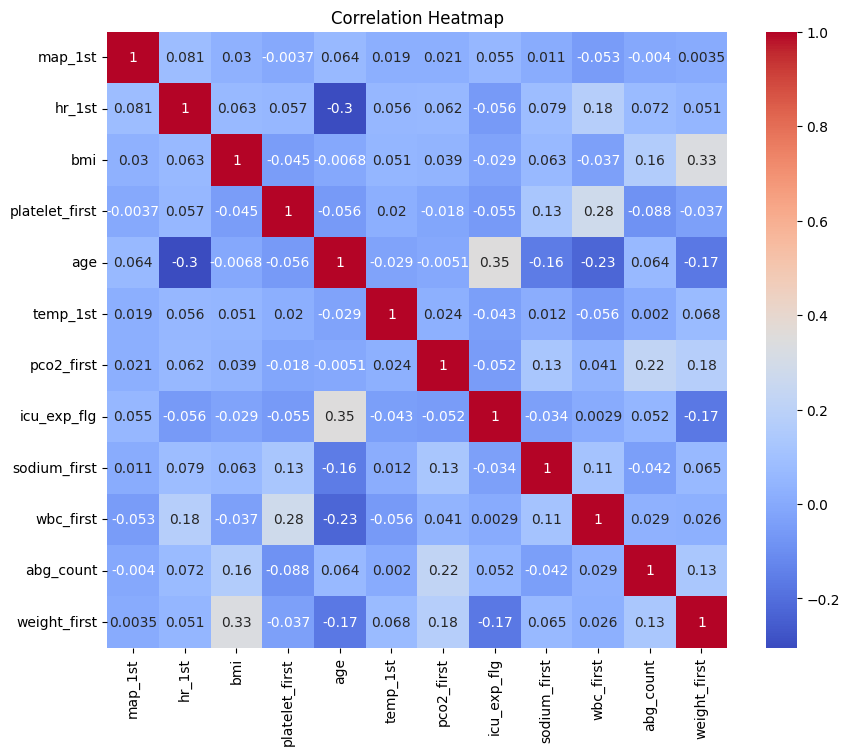

In [5]:

VariablesOfInterest = df [['map_1st','hr_1st','bmi','platelet_first','age','temp_1st','pco2_first','icu_exp_flg','sodium_first','wbc_first','abg_count', 'weight_first']]
plt.figure(figsize=(10, 8))
sns.heatmap(VariablesOfInterest.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

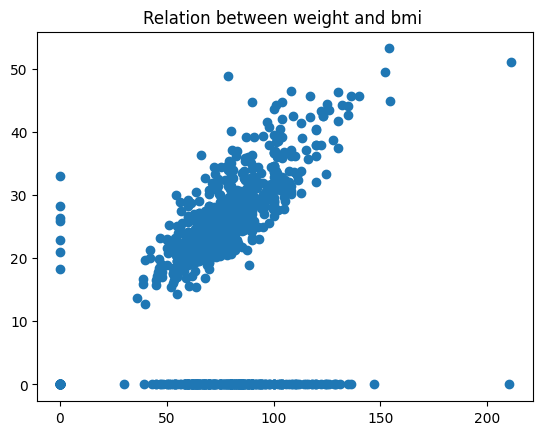

In [6]:
plt.scatter(df['weight_first'], df['bmi'] )
plt.title("Relation between weight and bmi ")
plt.show()

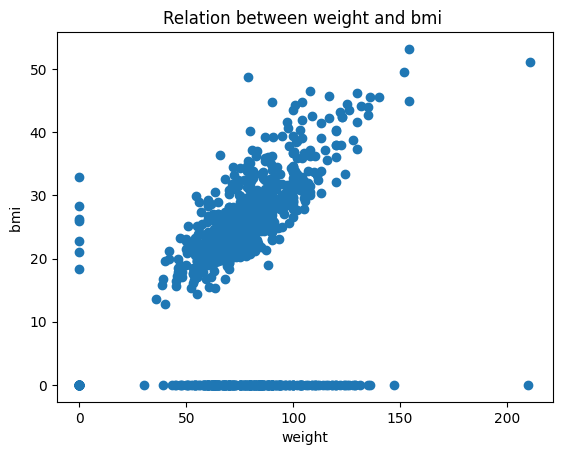

In [7]:
plt.scatter(df['weight_first'], df['bmi'] )
plt.title("Relation between weight and bmi ")
plt.xlabel('weight')
plt.ylabel('bmi ')
plt.show()

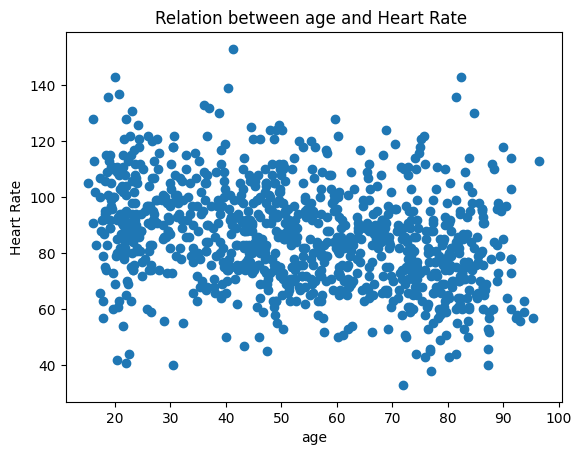

In [8]:
plt.scatter(df['age'], df['hr_1st'] )
plt.title("Relation between age and Heart Rate ")
plt.xlabel('age')
plt.ylabel('Heart Rate')
plt.show()

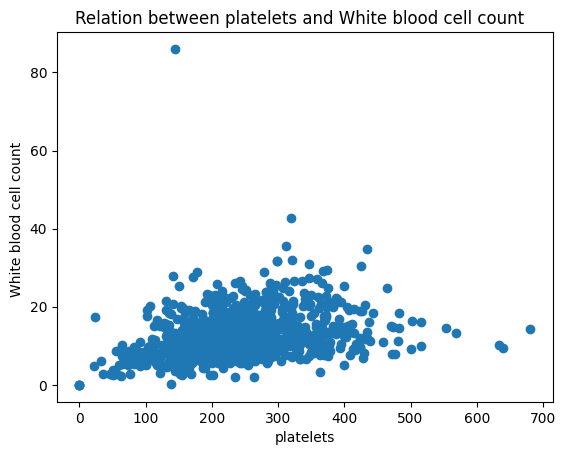

In [9]:

plt.scatter(df['platelet_first'], df['wbc_first'] )
plt.title("Relation between platelets and White blood cell count  ")
plt.xlabel('platelets')
plt.ylabel('White blood cell count ')
plt.show()

# 3. Create box plots to identify outliers.


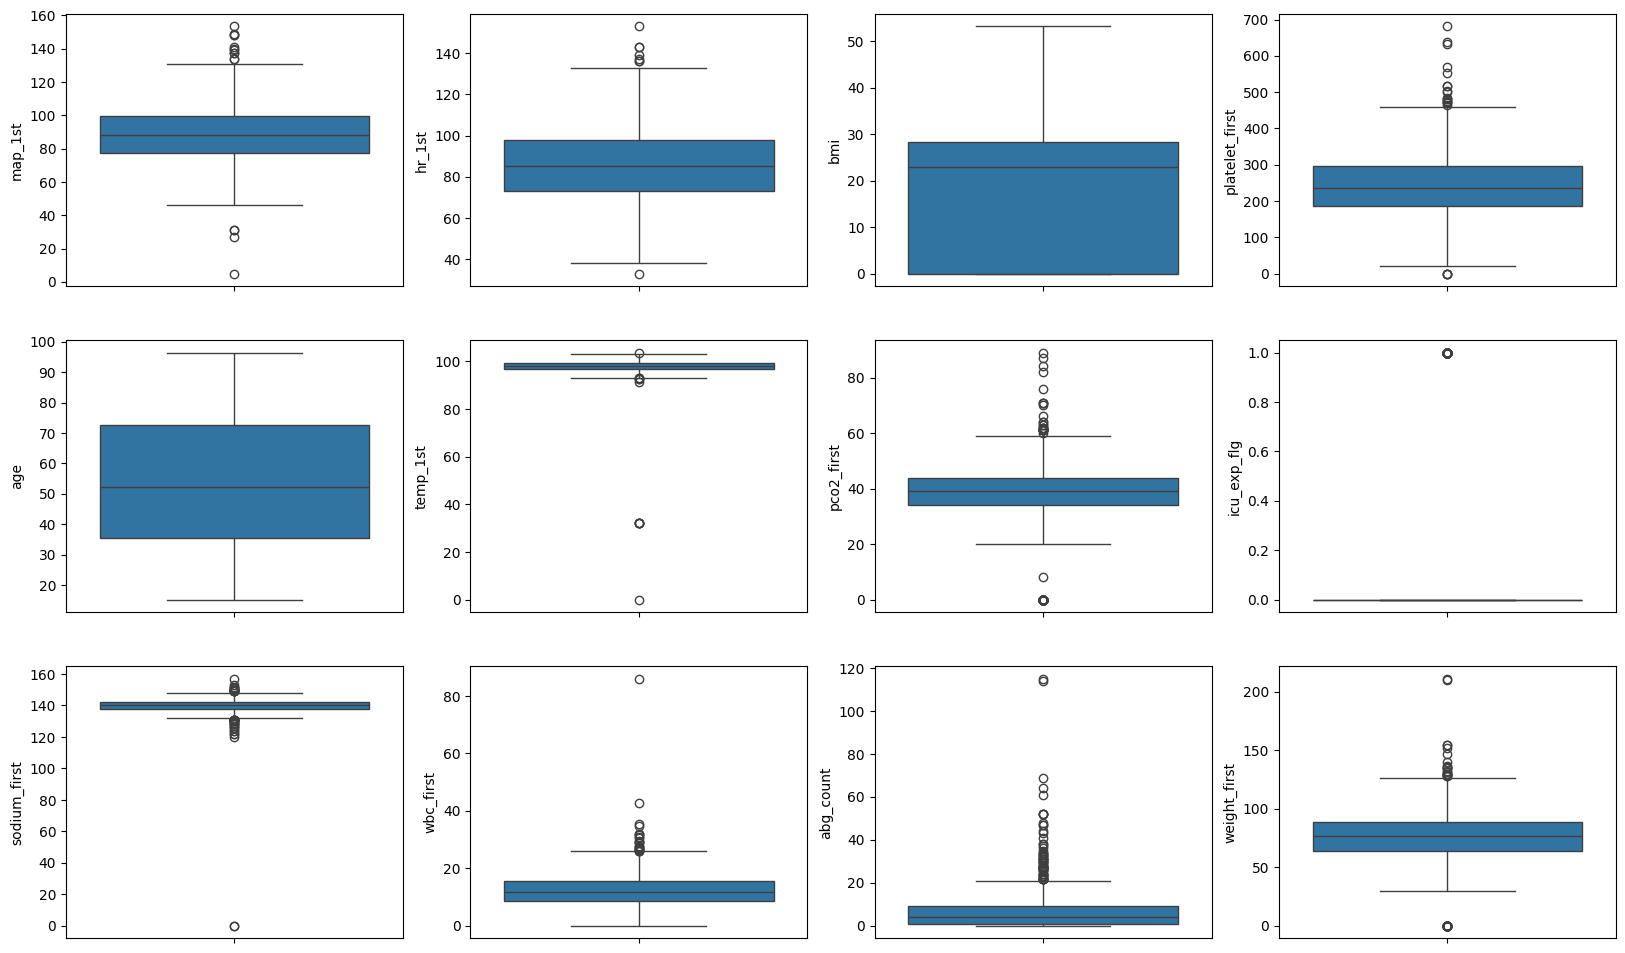

In [10]:
#Visualization of the selected variables using box plots
fig = plt.figure(figsize=(20,12))

count = 0

for variable in VariablesOfInterest:
    
    count += 1
    
    plt.subplot(3, 4, count)
    
    ax = sns.boxplot(y = variable, data = df)  
    
plt.show()

# 4. Perform data cleaning and preprocessing,his might include data amputation of the extreme variables.


-Showing 0 value of BMI and Weight. There is 305 values of bmi are 0 and 50 values of weght are zero. So we clean and replace the 0 values. 

In [11]:
(df['bmi'] == 0).sum(), (df['weight_first'] == 0).sum()

(305, 50)

Chekcking null value in dataset. In our dataset, there is no null value.

In [12]:
df.isnull().sum()

aline_flg             0
icu_los_day           0
hospital_los_day      0
age                   0
gender_num            0
weight_first          0
bmi                   0
sapsi_first           0
sofa_first            0
service_unit          0
service_num           0
day_icu_intime        0
day_icu_intime_num    0
hour_icu_intime       0
hosp_exp_flg          0
icu_exp_flg           0
day_28_flg            0
mort_day_censored     0
censor_flg            0
sepsis_flg            0
chf_flg               0
afib_flg              0
renal_flg             0
liver_flg             0
copd_flg              0
cad_flg               0
stroke_flg            0
mal_flg               0
resp_flg              0
map_1st               0
hr_1st                0
temp_1st              0
spo2_1st              0
abg_count             0
wbc_first             0
hgb_first             0
platelet_first        0
sodium_first          0
potassium_first       0
tco2_first            0
chloride_first        0
bun_first       

- Firstly, we drop the 0 values of weight which are 50 values.
- Then replace the 0 values of bmi corroleted by weight. Using linear model and predicting bmi by the weight. And replaced it.

In [13]:
df = df[df['weight_first'] != 0]
dfbminot0 = df[df['bmi'] != 0]

# Extract features (X) and target variable (y) for training
X = dfbminot0['weight_first'].values.reshape(-1, 1)
y = dfbminot0['bmi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Filter rows with 'bmi' equal to 0
dfbmi0 = df[df['bmi'] == 0]
if not dfbmi0.empty:
    # Extract 'weight_first' for rows with 'bmi' equal to 0
    wei = dfbmi0['weight_first'].values.reshape(-1, 1)

    # Predict BMI values for rows with 'bmi' equal to 0
    predbmi = model.predict(wei)

    # Update the DataFrame with predicted BMI values for rows with 'bmi' equal to 0
    df.loc[df['bmi'] == 0, 'bmi'] = predbmi
else:
    print("No rows with 'bmi' equal to 0 found.")



In [14]:
(df['bmi'] == 0).sum()

0

Text(0, 0.5, 'BMI')

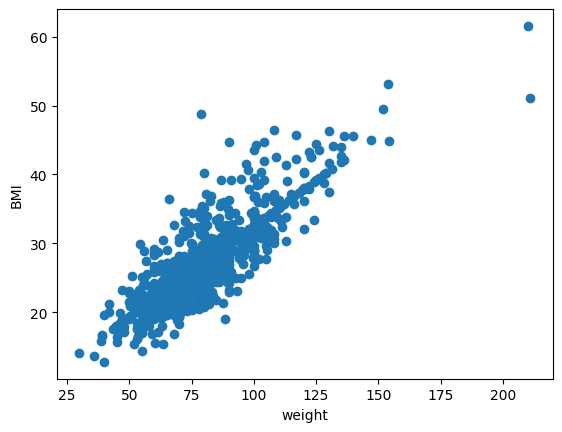

In [15]:
plt.scatter(df['weight_first'], df['bmi'] )
plt.xlabel('weight')
plt.ylabel('BMI')

Cleaning outliers of BMI, weight,'temp_1st','sodium_first','wbc_first','abg_count'.

In [16]:

df = df[df['bmi'] < 56]
df = df[df['weight_first'] < 150]
df = df[df['temp_1st'] > 80]
df = df[df['sodium_first'] > 100]
df = df[df['wbc_first'] < 50]
df = df[df['abg_count'] < 80]


In [17]:
shape2 = df.shape
removedValue = shape1[0]-shape2[0]
removedValue

64

# 5. Conduct data analysis: calculate the median, mean, and standard deviation of variables of interest. Discuss the implications of the results.



In [18]:
df.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.714597,3.535806,9.033769,52.745667,0.626362,79.183802,27.045541,13.759259,5.864924,1.0,...,244.164488,139.979303,3.995969,24.111002,104.602397,16.793028,1.001089,224.260349,37.379085,1647.301371
std,0.451852,3.569124,8.759725,21.253245,0.484033,18.432930,5.875512,4.792738,2.153147,0.0,...,91.242437,3.914379,0.708228,3.993957,5.155370,10.004834,0.706520,152.465069,14.364855,1660.840362
min,0.000000,0.500000,1.000000,15.190460,0.000000,30.000000,12.784877,0.000000,0.000000,1.0,...,0.000000,120.000000,1.900000,2.000000,86.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.460000,4.000000,35.429160,0.000000,66.650000,22.836542,11.000000,4.000000,1.0,...,186.000000,138.000000,3.600000,22.000000,101.000000,11.000000,0.700000,109.250000,34.000000,271.400002
50%,1.000000,2.350000,7.000000,51.916005,1.000000,78.000000,26.381773,14.000000,6.000000,1.0,...,237.000000,140.000000,3.900000,24.000000,105.000000,14.000000,0.900000,200.000000,39.000000,1206.559387
75%,1.000000,4.115000,11.000000,71.691775,1.000000,90.000000,29.921373,17.000000,7.000000,1.0,...,295.000000,142.000000,4.300000,27.000000,107.000000,19.000000,1.100000,328.750000,44.000000,2616.877625
max,1.000000,28.240000,112.000000,95.311070,1.000000,147.000000,48.785651,32.000000,16.000000,1.0,...,681.000000,157.000000,9.200000,38.000000,133.000000,139.000000,9.400000,634.000000,89.000000,10360.624020


In [19]:
median_values = df.select_dtypes(include=np.number).median()
median_values

aline_flg                1.000000
icu_los_day              2.350000
hospital_los_day         7.000000
age                     51.916005
gender_num               1.000000
weight_first            78.000000
bmi                     26.381773
sapsi_first             14.000000
sofa_first               6.000000
service_num              1.000000
day_icu_intime_num       4.000000
hour_icu_intime          8.000000
hosp_exp_flg             0.000000
icu_exp_flg              0.000000
day_28_flg               0.000000
mort_day_censored      731.000000
censor_flg               1.000000
sepsis_flg               0.000000
chf_flg                  0.000000
afib_flg                 0.000000
renal_flg                0.000000
liver_flg                0.000000
copd_flg                 0.000000
cad_flg                  0.000000
stroke_flg               0.000000
mal_flg                  0.000000
resp_flg                 0.000000
map_1st                 88.166649
hr_1st                  85.000000
temp_1st      

# 6. Create new box plots after data imputation and analyse the results.

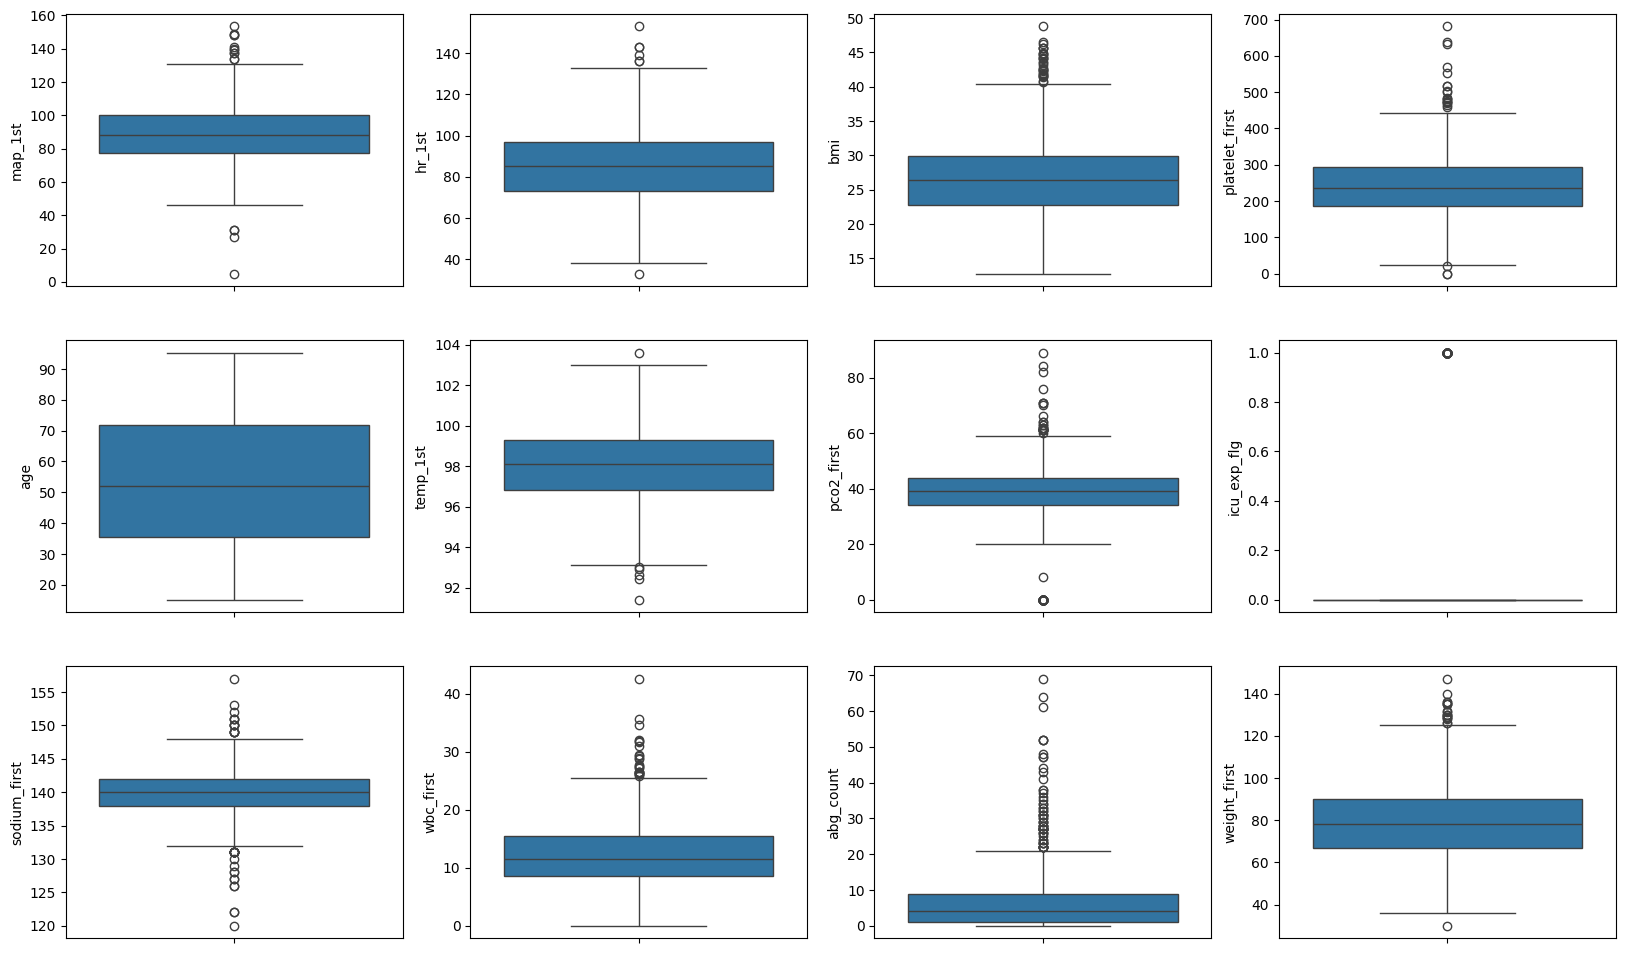

In [20]:
VariablesOfInterest = df [['map_1st','hr_1st','bmi','platelet_first','age','temp_1st','pco2_first','icu_exp_flg','sodium_first','wbc_first','abg_count', 'weight_first']]
fig = plt.figure(figsize=(20,12))

count = 0

for variable in VariablesOfInterest:
    
    count += 1
    
    plt.subplot(3, 4, count)
    
    ax = sns.boxplot(y = variable, data = df)  
    
plt.show()

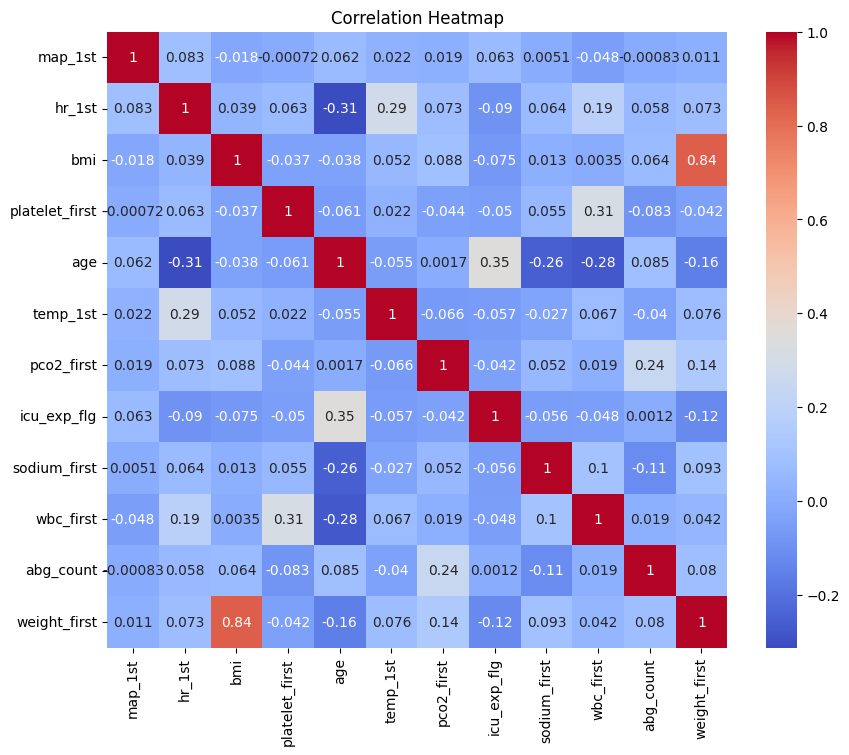

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(VariablesOfInterest.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 7. Explain the concept of multicollinearity in the context of the dataset. Apply PCA and visualize Principal Component 1 and Principal Component 2.


In [22]:
columns_to_drop = ['service_unit', 'day_icu_intime']
df = df.drop(columns=columns_to_drop)
df.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9,1,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
2,1,1.75,5,23.74217,1,95.2,28.464563,18,7,1,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
3,0,1.38,9,36.54657,1,72.0,23.982402,14,5,1,...,182,145,3.6,26.0,110,10,0.7,0,0,1877.560059
4,1,7.06,27,24.64717,1,90.0,25.474850,15,6,1,...,130,143,3.8,32.0,104,17,1.3,38,62,648.599976
5,1,1.13,2,51.18725,1,91.1,32.772315,16,5,1,...,423,144,3.8,32.0,111,15,0.9,76,56,545.592041


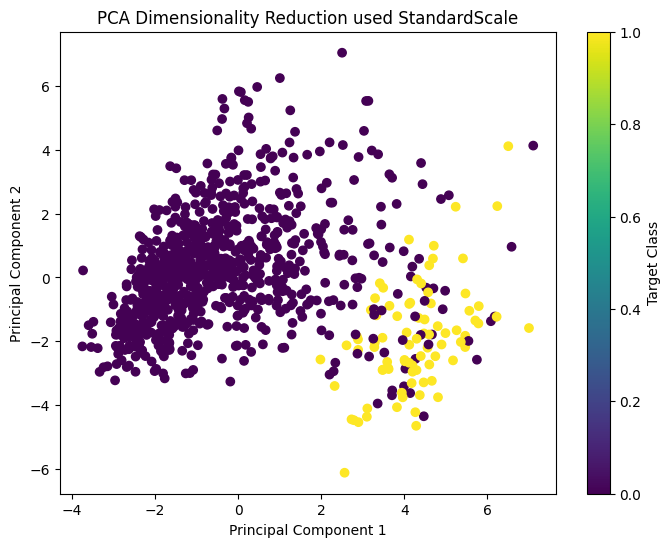

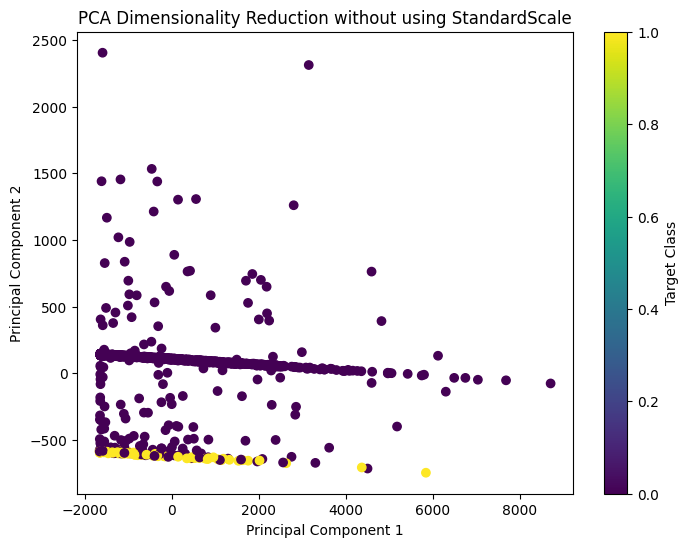

In [23]:
from sklearn.decomposition import PCA

X = df.drop(['icu_exp_flg'], axis=1)
y = df['icu_exp_flg']





# Apply PCA for dimensionality reduction to 2 components
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X)

pca = PCA(n_components=2)
X_reduced_s = pca.fit_transform(X_scaled)

# Visualize the reduced data using a scatter plot used StandardScale
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_s[:, 0], X_reduced_s[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Dimensionality Reduction used StandardScale')
plt.colorbar(label='Target Class')
plt.show()

pca1 = PCA(n_components=2)
X_reduced = pca1.fit_transform(X)
# Visualize the reduced data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Dimensionality Reduction without using StandardScale')
plt.colorbar(label='Target Class')
plt.show()


# 8. Using Logistic Regression
- In the SICU dataset given, your target variable is icu exp flg, which
is the ICU Mortality.
- Separate the variable icu exp flg from the main dataset to create
two distinct datasets: one containing all independent variables (X)
and another containing only the target variable (y). This process
ensures that the dataset for X includes data for all features excluding
icu exp flg, while the dataset for y exclusively holds the values of the
target variable icu exp flg.
- After doing this, Split your dataset into train and test data.
- Normalize the data using StandardScaler.
- Create and train a logistic regression model.
- Make predictions on the test set and Evaluate the performance of the
logistic regression model.
- Print the Accuracy and Confusion Matrix.
- Visualize your confusion matrix, so that it appears as follows.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [28]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96
Confusion Matrix:
[[161   2]
 [  6  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       163
           1       0.88      0.71      0.79        21

    accuracy                           0.96       184
   macro avg       0.92      0.85      0.88       184
weighted avg       0.95      0.96      0.95       184



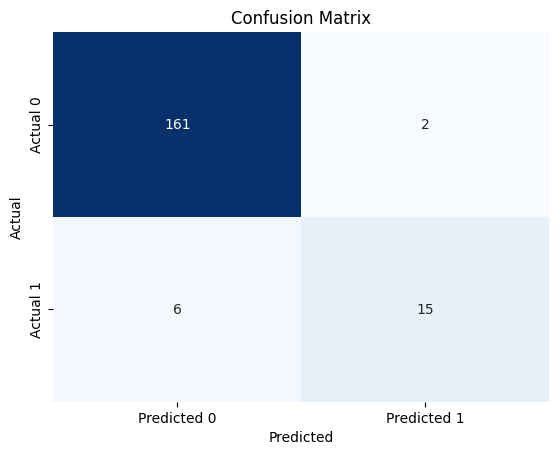

In [29]:

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()